In [1]:
import sys
sys.path.append("/home/elilouis/sublimationofsnow/")
import sosutils
import matplotlib.pyplot as plt
import ftplib
import os
import urllib
import glob
import xarray as xr
import datetime as dt
import altair as alt

In [2]:
# download dir
avp_download_dir = "/data2/elilouis/sublimationofsnow/asfs/avp"
kps_download_dir = "/data2/elilouis/sublimationofsnow/asfs/kps"

ftp_url = 'ftp1.esrl.noaa.gov'
# Avery Picnic product
avp_url = f'Observations/Campaigns/SPLASH/asfs50/1_level_ingest/'
# Kettle Ponds product
kps_url = f'Observations/Campaigns/SPLASH/asfs30/1_level_ingest/'


In [3]:
if not os.path.exists(avp_download_dir):
    os.mkdir(avp_download_dir)
if not os.path.exists(kps_download_dir):
    os.mkdir(kps_download_dir)

In [12]:
ftp = ftplib.FTP(ftp_url)
ftp.login()
ftp.cwd("Observations/Campaigns/SPLASH")

'250 Directory successfully changed.'

In [17]:
ftp.nlst('')

['asfs30',
 'asfs50',
 'internal',
 'modelobs',
 'quicklooks',
 'quicklooks_test',
 'simba_avery']

Avery picnic: Look at what kind of files are available, find all january files

In [5]:
ftp = ftplib.FTP(ftp_url)
ftp.login()
ftp.cwd(avp_url)
print([f for f in ftp.nlst() if '20220131' in f] )
january_avp_files = [f for f in ftp.nlst() if '202201' in f and f.startswith("slowsled") and f.endswith("000000.nc")] 

['fastsled.level1.asfs50-picnic.20220131.000000.nc', 'slowsled.level1.asfs50-picnic.20220131.000000.nc', 'turbsled.level1.asfs50-picnic.20220131.000000.10min.nc', 'turbsled.level1.asfs50-picnic.20220131.000000.30min.nc', 'turbsled.level1.asfs50-picnic.20220131.000000.60min.nc']


Kettle Ponds: Look at what kind of files are available, find all january files

In [6]:
ftp = ftplib.FTP(ftp_url)
ftp.login()
ftp.cwd(kps_url)
print([f for f in ftp.nlst() if '20220131' in f] )
january_kps_files = [f for f in ftp.nlst() if '202201' in f and f.startswith("slowsled") and f.endswith("000000.nc")] 

['fastsled.level1.asfs30-pond.20220131.000000.nc', 'slowsled.level1.asfs30-pond.20220131.000000.nc', 'turbsled.level1.asfs30-pond.20220131.000000.10min.nc', 'turbsled.level1.asfs30-pond.20220131.000000.30min.nc', 'turbsled.level1.asfs30-pond.20220131.000000.60min.nc']


In [7]:
for f in january_avp_files:
    remote_location = os.path.join('ftp://', ftp_url, avp_url, f)
    local_location = os.path.join(avp_download_dir, f)
    urllib.request.urlretrieve(remote_location, local_location)

In [8]:
for f in all_2022_avp_files:
    remote_location = os.path.join('ftp://', ftp_url, avp_url, f)
    local_location = os.path.join(avp_download_dir, f)
    urllib.request.urlretrieve(remote_location, local_location)

NameError: name 'all_2022_avp_files' is not defined

In [ ]:
for f in january_kps_files:
    remote_location = os.path.join('ftp://', ftp_url, kps_url, f)
    local_location = os.path.join(kps_download_dir, f)
    urllib.request.urlretrieve(remote_location, local_location)

In [11]:
avp_files = glob.glob(os.path.join(avp_download_dir, "*.nc"))
kps_files = glob.glob(os.path.join(kps_download_dir, "*.nc"))

In [12]:
avp_ds = xr.open_mfdataset(avp_files[-8:])

In [22]:
[(v,avp_ds[v].attrs.get('long_name')) for v in avp_ds]

[('base_time', 'Base time since Epoch'),
 ('time_offset', 'Time offset from base_time'),
 ('gps_lat_deg_Avg', 'latitude degrees from gps at station'),
 ('gps_lat_min_Avg', 'latitide minutes from gps at station'),
 ('gps_lon_deg_Avg', 'longitude degrees from gps at station'),
 ('gps_lon_min_Avg', 'longitude minutes from gps at station'),
 ('gps_hdg_Avg', 'heading from gps at station'),
 ('gps_alt_Avg', 'altitude from gps at station'),
 ('gps_qc', 'gps fix quality variable'),
 ('gps_hdop_Avg', 'gps Horizontal Dilution Of Precision (HDOP)'),
 ('gps_nsat_Avg', 'gps number of tracked satellites'),
 ('metek_InclX_Avg', 'sensor inclinometer pitch angle'),
 ('metek_InclY_Avg', 'sensor inclinometer roll angle'),
 ('PTemp_Avg', 'logger electronics panel temperature'),
 ('batt_volt_Avg', 'voltage of the power source supplying the logger'),
 ('counts_main_Tot',
  'number of completed cycles of the main scan during the 1 min averaging interval'),
 ('call_time_mainscan_Max',
  'duration of the longe

In [77]:
kps_ds = xr.open_mfdataset(kps_files[-8:])

In [78]:
avp_ds_30min = avp_ds.resample(time = "30Min").mean()
kps_ds_30min = kps_ds.resample(time = "30Min").mean()

In [79]:
avp_ds_30min = sosutils.modify_xarray_timezone(avp_ds_30min, 'UTC', 'US/Mountain')
kps_ds_30min = sosutils.modify_xarray_timezone(kps_ds_30min, 'UTC', 'US/Mountain')

In [84]:
avp_ds_30min

<xarray.Dataset>
Dimensions:                       (time: 384)
Coordinates:
  * time                          (time) datetime64[ns] 2022-01-24 ... 2022-0...
    local_time                    (time) datetime64[ns] 2022-01-23T17:00:00 ....
Data variables: (12/101)
    gps_lat_deg_Avg               (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gps_lat_min_Avg               (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gps_lon_deg_Avg               (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gps_lon_min_Avg               (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gps_hdg_Avg                   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gps_alt_Avg                   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                            ...
    sr30_swd_tilt_Avg             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    wspd_u_mean                   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    wspd_v_mean                   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    wspd_w_mean                   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    wspd_vec_mean                 (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    wdir_vec_mean                 (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/14)
    date_created:     Thu Sep 22 20:45:26 2022
    title:            SPLASH ASFS flux data product: 
    institution:      CIRES, University of Colorado and NOAA Physical Science...
    file_creator:     Michael R. Gallagher; Christopher J. Cox
    creator_email:    michael.r.gallagher@noaa.gov; christopher.j.cox@noaa.gov
    Funding:          *****?
    ...               ...
    references:       
    keywords:         Polar, Arctic, Supersite, Observations, Flux, Atmosphere
    conventions:      cf convention variable naming as attribute whenever pos...
    history:          raw uncurated data based on level 0 ingest files
    version:          0.99β, 8/31/2022
    quality_control:  This Level 1 product is for archival purposes and has u...

In [71]:
night_df = sosutils.get_nightime_df(
    'US/Mountain', 
    avp_ds_30min['lat'].values[0], 
    avp_ds_30min['lon'].values[0],
    [dt.datetime.strptime(date_str, '%Y%m%d') for date_str in avp_ds_30min.attrs['_file_dates']]
)

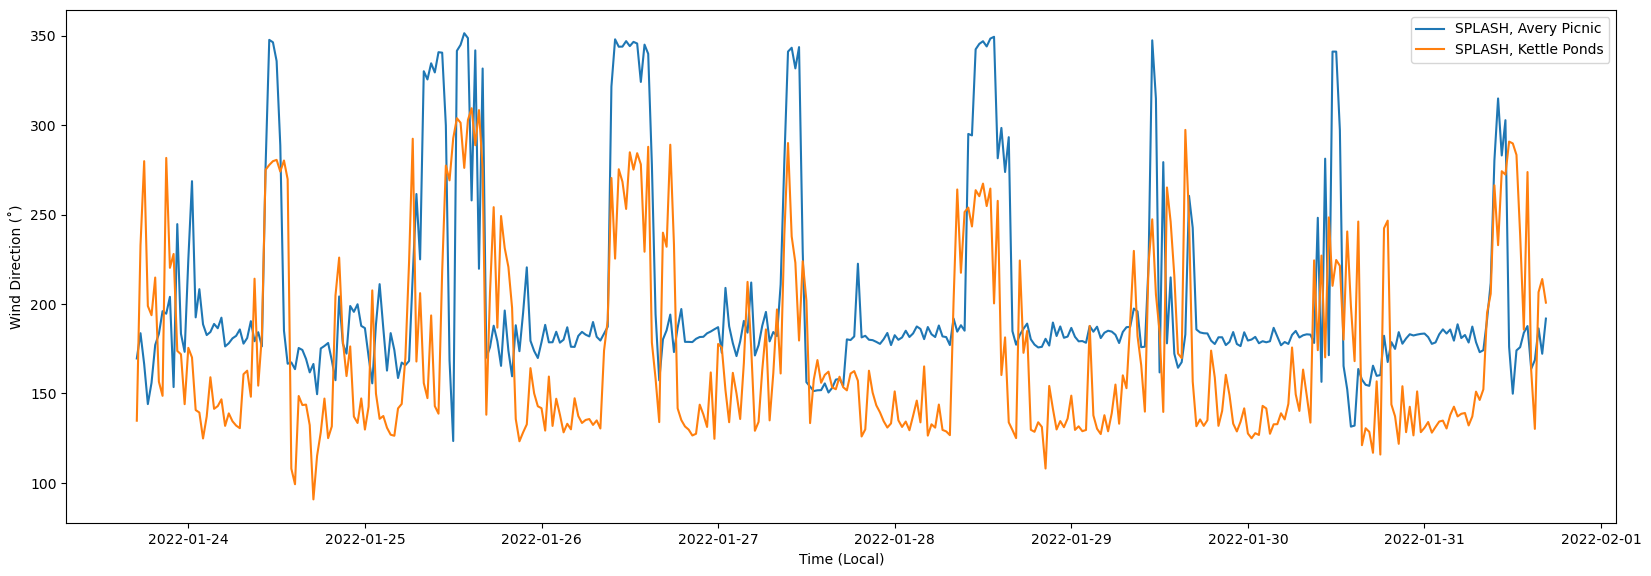

In [86]:
fig, ax = plt.subplots(figsize=(20,6.66))
ax.plot(avp_ds_30min.local_time, avp_ds_30min['wdir_vec_mean'], label="SPLASH, Avery Picnic")
ax.plot(kps_ds_30min.local_time, kps_ds_30min['wdir_vec_mean'], label="SPLASH, Kettle Ponds")
plt.xlabel("Time (Local)")
plt.ylabel("Wind Direction (˚)")
plt.legend()
# for i,row in night_df.iterrows():
#     ax.axvspan(row['sunset'], row['sunrise'], facecolor='0.2', alpha=0.25)

# Get all 2022 ASFS AVP slowsled data

In [ ]:
ftp = ftplib.FTP(ftp_url)
ftp.login()
ftp.cwd(avp_url)
print([f for f in ftp.nlst() if '20220131' in f] )
all_2022_avp_files = [f for f in ftp.nlst() if '2022' in f and f.startswith("slowsled") and f.endswith("000000.nc")] 

In [ ]:
for f in all_2022_avp_files:
    remote_location = os.path.join('ftp://', ftp_url, avp_url, f)
    local_location = os.path.join(avp_download_dir, f)
    urllib.request.urlretrieve(remote_location, local_location)

In [11]:
all_avp_files = glob.glob(os.path.join(avp_download_dir, "*.nc"))

In [12]:
len(all_avp_files)

365

In [2]:
import pandas as pd

In [97]:
df = pd.DataFrame()
for file in all_avp_files:
    ds = xr.open_dataset(file)['wdir_vec_mean']
    df = pd.concat([df, ds.to_dataframe()])

#### Reverse direction b/c splash records direction wind blows to (not direction wind blows from)

In [ ]:
df['wdir_vec_mean'] = df['wdir_vec_mean'] - 180
df['wdir_vec_mean'] = df['wdir_vec_mean'].apply(lambda x: x+360 if x < 0 else x)

In [99]:
df = df.resample("60Min").median().reset_index()

In [102]:
df['hour'] = df.time.dt.hour
df['doy'] = df.time.dt.day_of_year
df['weekofyear'] = df.time.apply(lambda dt: dt.isocalendar()[1])
df['start_doy'] = df['doy'] - 1

In [104]:
df = sosutils.modify_df_timezone(df, 'UTC', 'US/Mountain')

In [ ]:
df = df[df.time.dt.year == 2022]

In [105]:

df['Wind Direction'] = df['wdir_vec_mean']

In [88]:
import altair as alt

In [106]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [94]:
df['Day of Water Year'] = df['doy'] - 274
df['Day of Water Year'] = df['Day of Water Year'].apply(lambda doy: doy+365 if doy < 0 else doy)
df['Start Day of Water Year'] = df['Day of Water Year'] - 1

In [108]:
df

time  wdir_vec_mean  hour  doy  weekofyear  start_doy  \
0    2021-12-31 17:00:00     274.497064     0    1          52          0   
1    2021-12-31 18:00:00     345.019177     1    1          52          0   
2    2021-12-31 19:00:00     342.509681     2    1          52          0   
3    2021-12-31 20:00:00       4.227859     3    1          52          0   
4    2021-12-31 21:00:00     354.094311     4    1          52          0   
...                  ...            ...   ...  ...         ...        ...   
8755 2022-12-31 12:00:00     343.607205    19  365          52        364   
8756 2022-12-31 13:00:00     156.404359    20  365          52        364   
8757 2022-12-31 14:00:00     156.811743    21  365          52        364   
8758 2022-12-31 15:00:00     159.864379    22  365          52        364   
8759 2022-12-31 16:00:00     145.636484    23  365          52        364   

      Wind Direction  
0         274.497064  
1         345.019177  
2         342.509681  
3           4.227859  
4         354.094311  
...              ...  
8755      343.607205  
8756      156.404359  
8757      156.811743  
8758      159.864379  
8759      145.636484  

[8760 rows x 7 columns]

In [35]:
alt.Chart(df).mark_rect().encode(
    alt.X('hoursminutes(time):O', title='hour of day'),
    alt.Y('month(time):O', title='date'),
    alt.Color('Wind Direction:Q', scale=alt.Scale(scheme='rainbow'))
)

NameError: name 'df' is not defined

In [109]:
alt.Chart(df).mark_rect().encode(
    alt.X('hour:O', title='Hour of Day'),
    alt.Y("start_doy:Q", scale=alt.Scale(domain=[0,365], nice=False), title='Day of Water Year'),
    alt.Y2("doy:Q"),
    alt.Color('Wind Direction:Q', scale=alt.Scale(scheme='rainbow'))
).properties(height=600)

/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

# Tilden data

In [3]:
tilden_df = pd.read_parquet(
    '/data2/elilouis/sublimationofsnow/tilden_metdata_consolidated.parquet'
)

In [4]:
tilden_df = tilden_df[['date', 'wind_direction_3m',	'wind_direction_5m',	'wind_direction_10m',]]

In [6]:
tilden_df = tilden_df.set_index("date").resample("60Min").median().reset_index()

In [7]:
tilden_df

date  wind_direction_3m  wind_direction_5m  \
0    2022-01-01 00:00:00             295.50             297.70   
1    2022-01-01 01:00:00             299.50             301.60   
2    2022-01-01 02:00:00             317.80             310.00   
3    2022-01-01 03:00:00             309.65             305.10   
4    2022-01-01 04:00:00             277.60             277.95   
...                  ...                ...                ...   
6212 2022-09-16 20:00:00            -999.00            -999.00   
6213 2022-09-16 21:00:00            -999.00            -999.00   
6214 2022-09-16 22:00:00            -999.00            -999.00   
6215 2022-09-16 23:00:00            -999.00            -999.00   
6216 2022-09-17 00:00:00            -999.00            -999.00   

      wind_direction_10m  
0                 294.70  
1                 297.40  
2                 298.60  
3                 302.00  
4                 277.45  
...                  ...  
6212             -999.00  
6213             -999.00  
6214             -999.00  
6215             -999.00  
6216             -999.00  

[6217 rows x 4 columns]

In [8]:
tilden_df['hour'] = tilden_df.date.dt.hour
tilden_df['doy'] = tilden_df.date.dt.day_of_year
tilden_df['weekofyear'] = tilden_df.date.apply(lambda dt: dt.isocalendar()[1])
tilden_df['start_doy'] = tilden_df['doy'] - 1


In [10]:
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [16]:
import numpy as np

In [17]:
tilden_df.wind_direction_10m = tilden_df.wind_direction_10m.apply(lambda x: np.nan if x == -999 else x)
tilden_df.wind_direction_3m = tilden_df.wind_direction_3m.apply(lambda x: np.nan if x == -999 else x)
tilden_df.wind_direction_5m = tilden_df.wind_direction_5m.apply(lambda x: np.nan if x == -999 else x)

In [26]:
alt.Chart(tilden_df).mark_rect().encode(
    alt.X('hour:O', title='Hour of Day'),
    alt.Y("start_doy:Q", scale=alt.Scale(domain=[0,260], nice=False), title='Day of Year'),
    alt.Y2("doy:Q"),
    alt.Color('wind_direction_10m:Q', scale=alt.Scale(scheme='rainbow'))
).properties(height=600)

alt.Chart(...)

In [30]:
alt.Chart(tilden_df).mark_rect().encode(
    alt.X('hoursminutes(date):O', title='hour of day'),
    alt.Y('month(date):O', title='date'),
    alt.Color('wind_direction_10m:Q', scale=alt.Scale(scheme='rainbow'))
)

alt.Chart(...)

In [27]:
tilden_df.date.max()

Timestamp('2022-09-17 00:00:00')

# SAIL Gothic data

In [2]:
import act

In [3]:
code = "guc30ecorS3.b1"
username = os.getenv("ARM_USERNAME")
token = os.getenv("ARM_TOKEN")
start_date = "20220101"
end_date = "20221231"

In [44]:
act.discovery.download_data(
    username,    token,    code,    start_date,    end_date,
    output = os.path.join(f"/data2/elilouis/sublimationofsnow/{code}")
)

[DOWNLOADING] guc30ecorS3.b1.20220729.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220427.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220509.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220503.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220507.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220504.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220508.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220505.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20221201.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220501.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220206.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220502.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220506.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220510.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220720.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220205.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220428.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220430.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220429.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20220728.000000.cdf
[DOWNLOADING] guc30e

['/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220729.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220427.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220509.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220503.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220507.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220504.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220508.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220505.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20221201.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220501.000000.cdf',
 '/data2/elilouis/sublimationofsnow/guc30ecorS3.b1/guc30ecorS3.b1.20220206.000000.cdf',
 '/data2/elilouis/sublimationofs

In [4]:
ecor_ds = act.io.armfiles.read_netcdf(glob.glob(os.path.join(
    os.path.join(f"/data2/elilouis/sublimationofsnow/{code}"), 
    '*.cdf'
)))

In [8]:
ecor_df = ecor_ds['wind_dir'].to_dataframe().reset_index()

In [10]:
ecor_df['month'] = ecor_df.time.dt.month
ecor_df['DOY'] = ecor_df.time.dt.day_of_year
ecor_df['hour'] = ecor_df.time.dt.hour

In [13]:
ecor_daily_df = ecor_df.groupby(['DOY', 'hour']).median().reset_index()
ecor_monthly_df = ecor_df.groupby(['month', 'hour']).median().reset_index()

/tmp/ipykernel_327941/182856157.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ecor_daily_df = ecor_df.groupby(['DOY', 'hour']).median().reset_index()
/tmp/ipykernel_327941/182856157.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ecor_monthly_df = ecor_df.groupby(['month', 'hour']).median().reset_index()


In [15]:
ecor_daily_df['start_DOY'] = ecor_daily_df['DOY'] - 1
ecor_monthly_df['start_month'] = ecor_monthly_df['month'] - 1

In [26]:
ecor_monthly_df

month  hour    index    wind_dir    doy    DOY  start_month
0        1     0    720.5  316.549988   16.0   16.0            0
1        1     1    722.5  316.049988   16.0   16.0            0
2        1     2    724.5  317.700012   16.0   16.0            0
3        1     3    726.5  318.000000   16.0   16.0            0
4        1     4    728.5  318.450012   16.0   16.0            0
..     ...   ...      ...         ...    ...    ...          ...
283     12    19  16415.5  130.399994  350.0  350.0           11
284     12    20  16417.5  293.250000  350.0  350.0           11
285     12    21  16419.5  292.950012  350.0  350.0           11
286     12    22  16421.5  305.599976  350.0  350.0           11
287     12    23  16423.0  313.399994  350.0  350.0           11

[288 rows x 7 columns]

In [22]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [23]:
alt.Chart(ecor_daily_df).mark_rect().encode(
    alt.X('hour:O', title='Hour of Day'),
    alt.Y("start_DOY:Q", scale=alt.Scale(domain=[0,365], nice=False), title='Day of Year'),
    alt.Y2("DOY:Q"),
    alt.Color('wind_dir:Q', scale=alt.Scale(scheme='rainbow'))
).properties(height=600)

/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [25]:
ecor_monthly_df

month  hour    index    wind_dir    doy    DOY  start_month
0        1     0    720.5  316.549988   16.0   16.0            0
1        1     1    722.5  316.049988   16.0   16.0            0
2        1     2    724.5  317.700012   16.0   16.0            0
3        1     3    726.5  318.000000   16.0   16.0            0
4        1     4    728.5  318.450012   16.0   16.0            0
..     ...   ...      ...         ...    ...    ...          ...
283     12    19  16415.5  130.399994  350.0  350.0           11
284     12    20  16417.5  293.250000  350.0  350.0           11
285     12    21  16419.5  292.950012  350.0  350.0           11
286     12    22  16421.5  305.599976  350.0  350.0           11
287     12    23  16423.0  313.399994  350.0  350.0           11

[288 rows x 7 columns]

In [27]:
alt.Chart(ecor_monthly_df).mark_rect().encode(
    alt.X('hour:O', title='Hour of Day'),
    alt.Y("start_month:Q", ),
    alt.Y2("month:Q"),
    alt.Color('wind_dir:Q', scale=alt.Scale(scheme='rainbow'))
).properties(height=600)

/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)